In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('./data/heart.csv')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [3]:
data = shuffle(data)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1


In [4]:
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
data = data[features]

In [5]:
labels = data['output']
train_labels = np.array(labels[:280])
test_labels = np.array(labels[280:])

In [6]:
train_data = np.array(data.iloc[:280, :-1])
test_data = np.array(data.iloc[280:, :-1])

<AxesSubplot:>

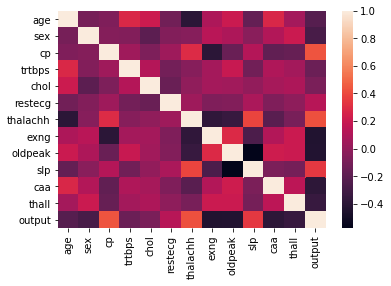

In [14]:
sns.heatmap(data.corr())

In [13]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((280, 12), (280,), (23, 12), (23,))

In [8]:
def initialize_weights(shape, dtype=None):
    
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

def initialize_bias(shape, dtype=None):
    
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

def DeepLearningModel(input_shape):
    model = Sequential()
    
    model.add(Input(input_shape))
    
    model.add(Dense(16, activation='relu', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    
    model.add(Dense(32, activation='relu', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    
    model.add(Dense(64, activation='relu', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    
    model.add(Dense(128, activation='relu', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
                
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))    
    
    return model

model = DeepLearningModel((12))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 11,313
Trainable params: 11,313
Non-trainable params: 0
_________________________________________________________________


In [9]:
lr = 0.003
epochs = 256
batch_size = 100
optimizer = Adam(lr)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size)

# model = DecisionTreeClassifier()
# model.fit(train_data, train_labels)

Epoch 1/256
3/3 [==============================] - 0s 3ms/step - loss: 0.2505 - accuracy: 0.5411
Epoch 2/256
3/3 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.4852
Epoch 3/256
3/3 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5298
Epoch 4/256
3/3 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.5373
Epoch 5/256
3/3 [==============================] - 0s 3ms/step - loss: 0.2531 - accuracy: 0.5261
Epoch 6/256
3/3 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.5423
Epoch 7/256
3/3 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.5073
Epoch 8/256
3/3 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.6157
Epoch 9/256
3/3 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.5498
Epoch 10/256
3/3 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.5436
Epoch 11/256
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.8454
Epoch 85/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.8534
Epoch 86/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.8550
Epoch 87/256
3/3 [==============================] - 0s 3ms/step - loss: 0.1333 - accuracy: 0.8618
Epoch 88/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.8309
Epoch 89/256
3/3 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.8579
Epoch 90/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.8423
Epoch 91/256
3/3 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.8464
Epoch 92/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.8321
Epoch 93/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.8432
Epoch 94/256
3/3 [===============

Epoch 167/256
3/3 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.8320
Epoch 168/256
3/3 [==============================] - 0s 3ms/step - loss: 0.1230 - accuracy: 0.8438
Epoch 169/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.8482
Epoch 170/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.8486
Epoch 171/256
3/3 [==============================] - 0s 3ms/step - loss: 0.1240 - accuracy: 0.8511
Epoch 172/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.8538
Epoch 173/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.8425
Epoch 174/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.8555
Epoch 175/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.8504
Epoch 176/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.8429
Epoch 177/

3/3 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.8514
Epoch 250/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.8132
Epoch 251/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.8387
Epoch 252/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.8545
Epoch 253/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.8620
Epoch 254/256
3/3 [==============================] - 0s 3ms/step - loss: 0.1260 - accuracy: 0.8395
Epoch 255/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 0.8355
Epoch 256/256
3/3 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.8479


In [10]:
model.evaluate(test_data, test_labels)

1/1 [==============================] - 0s 128ms/step - loss: 0.0956 - accuracy: 0.8696


[0.09558744728565216, 0.8695651888847351]

<AxesSubplot:>

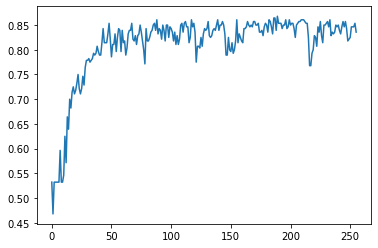

In [46]:
sns.lineplot(x=history.epoch, y=history.history['accuracy'])

<AxesSubplot:>

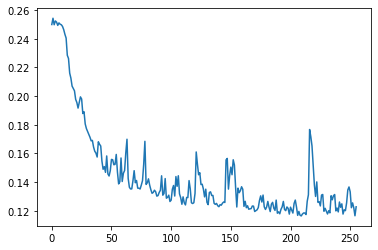

In [43]:
sns.lineplot(x=history.epoch, y=history.history['loss'])

In [24]:
pred = np.round(model.predict(test_data))

pred = list(map(int, pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

<AxesSubplot:>

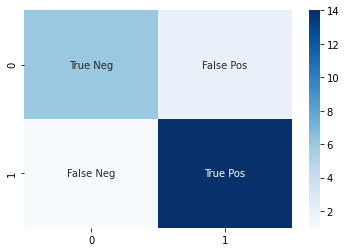

In [35]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(pred, test_labels), cmap='Blues', annot=labels, fmt='')

### General Linear Regression using Mean Squared Error gave the best accuracy of 86.96%